# **Problem Definition :**

In the fast-paced retail sector, the ability to anticipate future sales plays a vital role in both day-to-day operations and long-term planning. Forecasting product sales involves estimating the quantity of items a store is likely to sell in upcoming periods, using past performance data and a variety of influencing factors. These include store classification, geographic location, regional demographics, marketing campaigns, and time-related elements such as holidays and seasonal patterns. This project aims to build a forecasting model that leverages historical sales records from multiple stores to predict future sales outcomes with greater accuracy.

## **Import important Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Loading Dataset**

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Dataset/ProductSalesForecasting/TRAIN.csv')
test = pd.read_csv('/content/drive/MyDrive/Dataset/ProductSalesForecasting/TEST_FINAL.csv')

In [4]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [5]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [6]:
train.shape, test.shape

((188340, 10), (22265, 8))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [8]:
train['Date']=pd.to_datetime(train['Date'])

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


### **Checking Missing Values**

In [10]:
train.isna().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0
#Order,0
Sales,0


**There are no missing values in dataset.**

In [11]:
train.describe()

,Store_id,Date,Holiday,#Order,Sales
count,188340.000000,188340,188340.000000,188340.000000,188340.000000
mean,183.000000,2018-09-15 12:00:00.000000256,0.131783,68.205692,42784.327982
min,1.000000,2018-01-01 00:00:00,0.000000,0.000000,0.000000
25%,92.000000,2018-05-09 18:00:00,0.000000,48.000000,30426.000000
50%,183.000000,2018-09-15 12:00:00,0.000000,63.000000,39678.000000
75%,274.000000,2019-01-22 06:00:00,0.000000,82.000000,51909.000000
max,365.000000,2019-05-31 00:00:00,1.000000,371.000000,247215.000000
std,105.366308,NaN,0.338256,30.467415,18456.708302


In [12]:
train.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,188340,188340,T1188340,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_id,188340.0,NaN,NaN,NaN,183.0,1.0,92.0,183.0,274.0,365.0,105.366308
Store_Type,188340,4,S1,88752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Type,188340,5,L1,85140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,188340,4,R1,63984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,188340,NaN,NaN,NaN,2018-09-15 12:00:00.000000256,2018-01-01 00:00:00,2018-05-09 18:00:00,2018-09-15 12:00:00,2019-01-22 06:00:00,2019-05-31 00:00:00,NaN
Holiday,188340.0,NaN,NaN,NaN,0.131783,0.0,0.0,0.0,0.0,1.0,0.338256
Discount,188340,2,No,104051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#Order,188340.0,NaN,NaN,NaN,68.205692,0.0,48.0,63.0,82.0,371.0,30.467415
Sales,188340.0,NaN,NaN,NaN,42784.327982,0.0,30426.0,39678.0,51909.0,247215.0,18456.708302


# **EDA**

In [13]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


## **UNIVARIATE ANALYSIS**

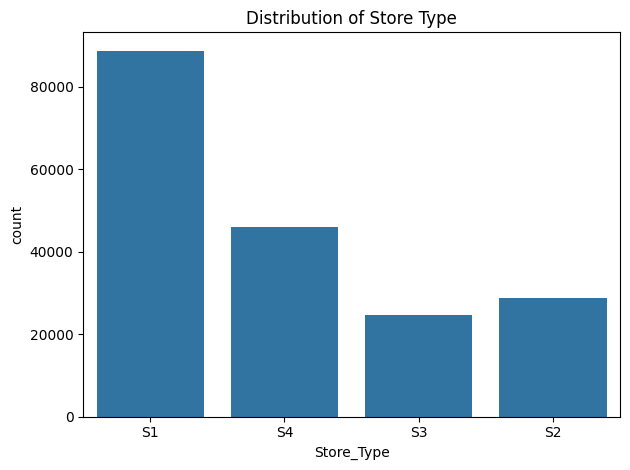

In [14]:
sns.countplot(x="Store_Type", data=train)
plt.title(f'Distribution of Store Type')
plt.xticks()
plt.tight_layout()
plt.show()

**An initial examination of the dataset reveals that the distribution of store types is uneven. Store Type S1 has the highest representation, followed by S4, S2, and S3 respectively. This indicates that the majority of the data comes from stores classified as S1, which could be due to a larger number of stores operating under this type or more frequent data collection from these outlets.**

<Axes: xlabel='Discount', ylabel='count'>

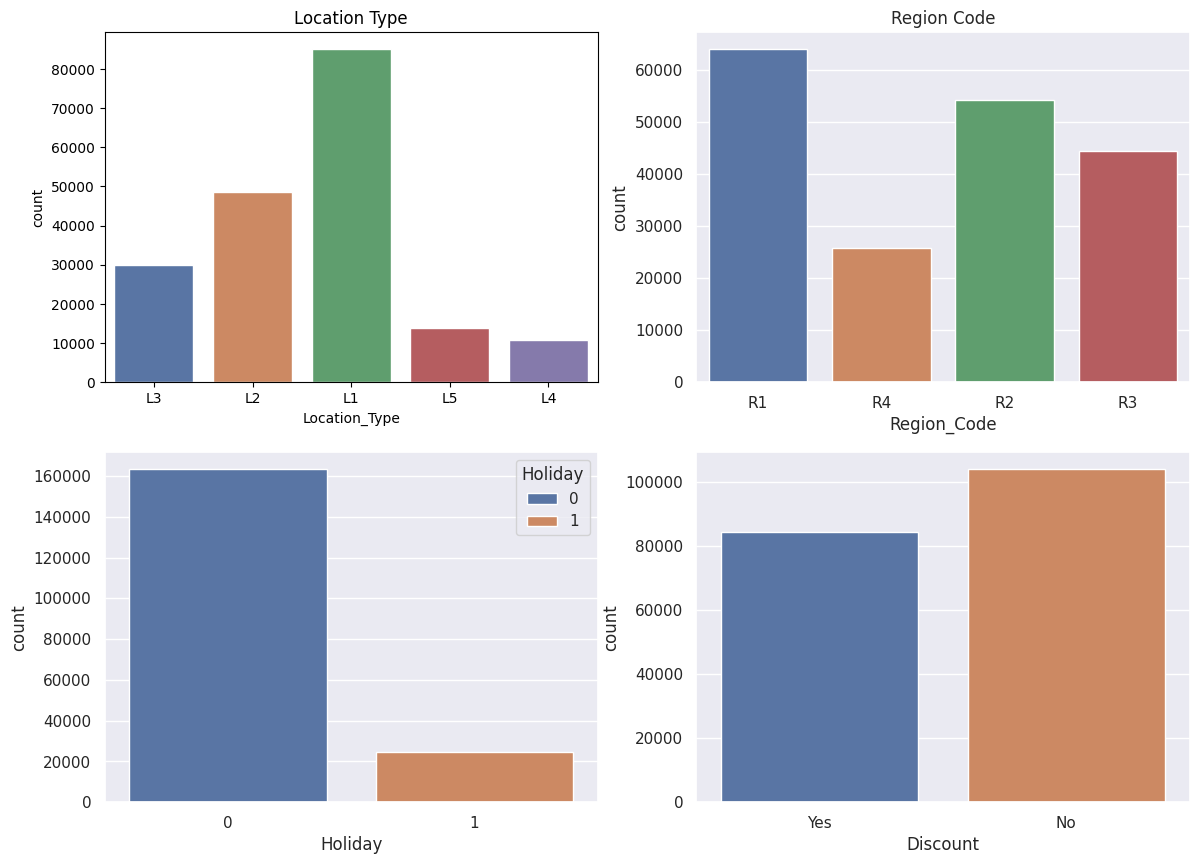

In [15]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.set(style="darkgrid")
sns.countplot(x="Location_Type", data=train, hue="Location_Type")
plt.title("Location Type")

plt.subplot(2,2, 2)
#plt.figure(figsize=(10 , 5))
sns.set(style="darkgrid")
sns.countplot(x="Region_Code", data=train, hue="Region_Code")
plt.title("Region Code")

plt.subplot(2, 2,3)
#plt.figure(figsize=(10 , 5))
sns.set(style="darkgrid")
sns.countplot(x="Holiday", data=train, hue="Holiday")
#plt.title("Holiday")

plt.subplot(2, 2, 4)
#plt.figure(figsize=(10 , 5))
sns.set(style="darkgrid")
sns.countplot(x="Discount", data=train, hue="Discount")
#plt.title("Discount")

**INSIGHTS :**

The dataset reveals that the majority of stores are located in Location Type L1, which has the highest count among all location categories. This is followed by L2 and L3, which represent the next largest groups of store locations. Locations classified as L5 and L4 have comparatively fewer stores, indicating that these areas are less represented in the dataset.

An analysis of the regional distribution reveals that Region Code R1 has the highest representation in the dataset, indicating that most of the store data points come from this particular geographical region. This is followed by Region Code R2, then R3, and lastly R4, which has the least number of records.

The vast majority of the records correspond to non-holidays (Holiday = 0), with a count exceeding 160,000. The number of records for holidays (Holiday = 1) is much smaller, around 25,000. This suggests that the dataset is heavily skewed towards regular days rather than holidays, which is typical as holidays occur less frequently.

The bar chart illustrates the distribution of transactions based on whether a discount was applied. It is evident that non-discounted transactions (“No”) are more prevalent, with a count exceeding 100,000. In comparison, discounted transactions (“Yes”) account for just over 85,000 records.

## **Checking for outliers**

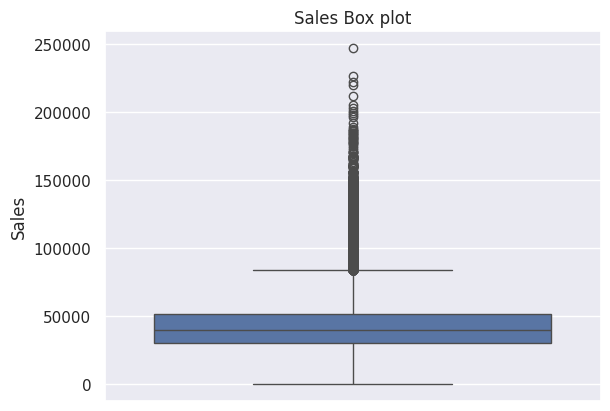

In [16]:
sns.boxplot(y='Sales',data=train)

plt.title("Sales Box plot")

plt.show()

In [17]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers

for i in range(0,110,10):

    print("{} percentile value is {}".format(i,np.percentile(train['Sales'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 23439.756
20 percentile value is 28455.0
30 percentile value is 32268.0
40 percentile value is 35940.0
50 percentile value is 39678.0
60 percentile value is 43883.856
70 percentile value is 48846.0
80 percentile value is 55515.0
90 percentile value is 66282.0
100 percentile value is 247215.0


In [49]:
#calculating 90-100th percentile to find a the correct percentile value for removal of outliers

for i in range(90,101,1):

    print("{} percentile value is {}".format(i,np.percentile(train['Sales'].dropna(),i)))

90 percentile value is 66282.0
91 percentile value is 67838.44920000002
92 percentile value is 69638.64000000001
93 percentile value is 71688.81000000006
94 percentile value is 73965.0
95 percentile value is 76809.29999999993
96 percentile value is 80317.32
97 percentile value is 84738.0
98 percentile value is 91029.0
99 percentile value is 102159.0
100 percentile value is 247215.0


### **INSIGHTS :**
* From 99th percentile (102k) to 100th percentile (247k), there is a massive jump, more than doubling.

* This suggests extreme outliers or very high values at the very top end of the distribution.

<ipython-input-19-2b8c946ebd9b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train['Sales'].dropna(),label="Sales", hist_kws=kwargs, kde_kws=kwargs)


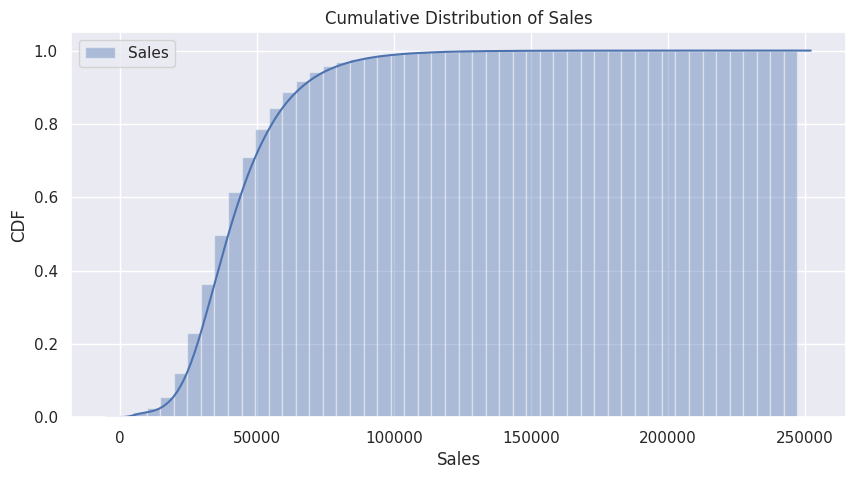

In [19]:
# Sales distribution cdf

plt.figure(figsize=(10,5))

kwargs = {'cumulative': True}

ax = sns.distplot(train['Sales'].dropna(),label="Sales", hist_kws=kwargs, kde_kws=kwargs)

ax.set_title('Cumulative Distribution of Sales')

ax.set(xlabel='Sales', ylabel='CDF')

plt.legend()

plt.show()

### **INSIGHTS :**

The cumulative distribution plot illustrates how total sales per order are distributed across all transactions. The curve shows a steep increase between the ₹10,000 to ₹60,000 range, indicating that the majority of orders fall within this sales bracket. This suggests that most sales transactions are of moderate value. The distribution is clearly right-skewed, with the curve flattening significantly beyond ₹100,000. This implies that although there are some very high-value orders — extending up to ₹250,000 — they represent a small proportion of the total order count. Approximately 90% of all orders have total sales below ₹80,000, emphasizing that the business relies primarily on mid-range sales volumes.

<ipython-input-20-b967353200ad>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train['#Order'].dropna(),label="Number of Orders", hist_kws=kwargs, kde_kws=kwargs)


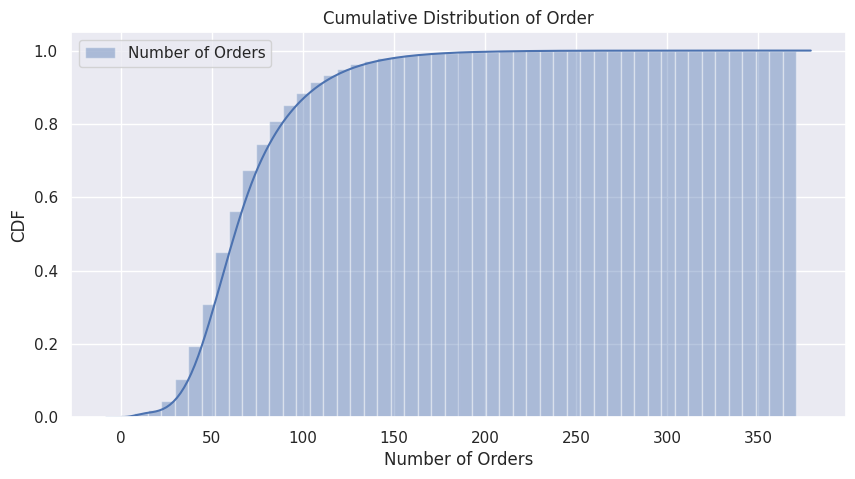

In [20]:
# Order distribution cdf

plt.figure(figsize=(10,5))

kwargs = {'cumulative': True}

ax = sns.distplot(train['#Order'].dropna(),label="Number of Orders", hist_kws=kwargs, kde_kws=kwargs)

ax.set_title('Cumulative Distribution of Order')

ax.set(xlabel='Number of Orders', ylabel='CDF')

plt.legend()

plt.show()

### **INSIGHTS :**
The cumulative distribution plot of number of order shows that most orders are associated with lower sales figures. A sharp rise in the CDF between the 30 to 100 sales range indicates that a large number of orders fall within this segment. This suggests that the majority of transactions are of small to moderate sales value. The distribution is right-skewed, meaning while a few orders have high sales values (extending beyond 200 to 350), they make up a very small portion of the total orders. The curve flattens after 150, highlighting that such high-value orders are rare. Overall, nearly 80% of the total number of orders are associated with sales values below 100.

# **Bi-Variate Analysis**

<Axes: xlabel='Location_Type', ylabel='Sales'>

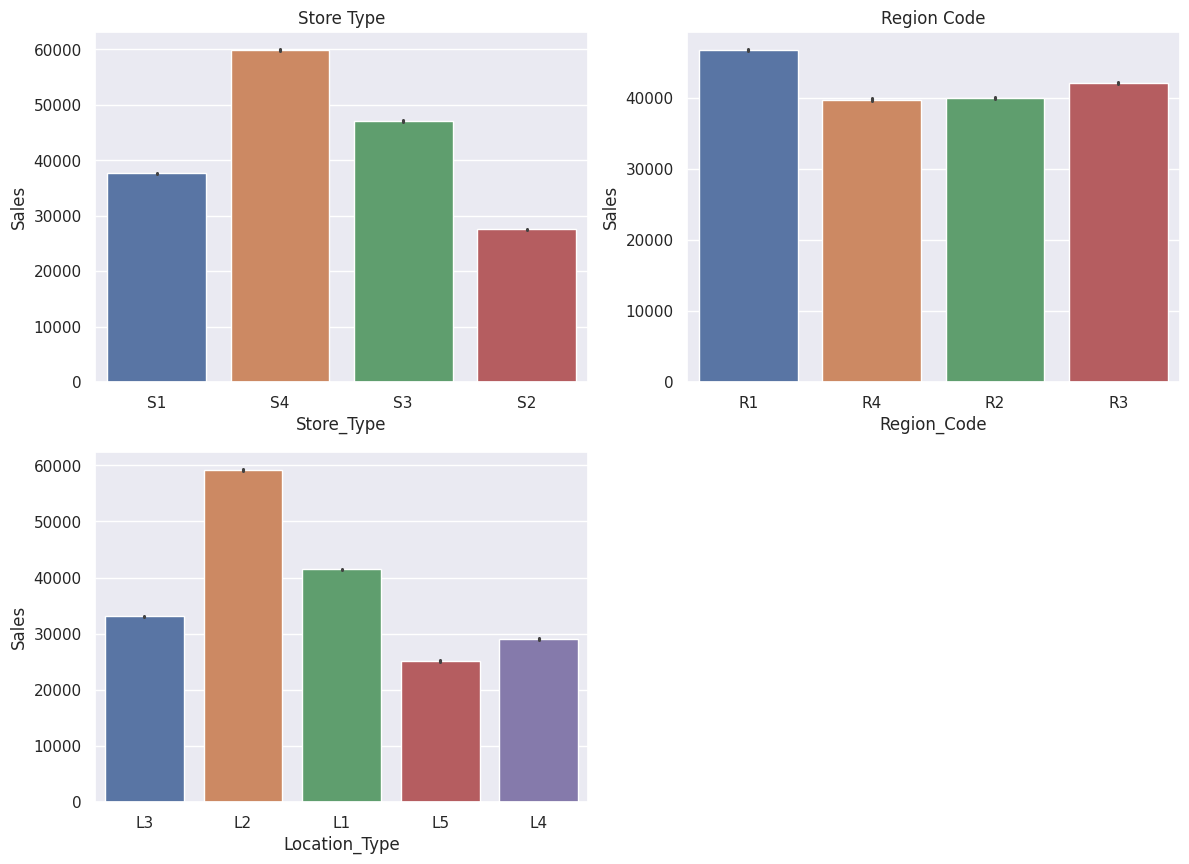

In [22]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.set(style="darkgrid")
sns.barplot(x="Store_Type",y="Sales",data=train, hue="Store_Type")
plt.title("Store Type")

plt.subplot(2,2, 2)
#plt.figure(figsize=(10 , 5))
sns.set(style="darkgrid")
sns.barplot(x="Region_Code",y="Sales",data=train, hue="Region_Code")
plt.title("Region Code")

plt.subplot(2, 2,3)
#plt.figure(figsize=(10 , 5))
sns.set(style="darkgrid")
sns.barplot(x="Location_Type",y="Sales",data=train, hue="Location_Type")
#plt.title("Holiday")

## **INSIGHTS :**
1. The bar chart shows that Store Type S4 generates the highest average sales, followed by S3, S1, and finally S2, which has the lowest average sales among all types. Specifically, S4 leads with around ₹60,000 in sales, indicating it is the top-performing store type. Store Type S2, on the other hand, lags significantly behind, suggesting it may be underperforming or catering to a different market segment.

2. The average sales vary notably across different location types, highlighting differences in performance or customer behavior by area. Location Type L2 leads with the highest average sales of approximately 59,231, suggesting it is the most profitable or busiest location on a per-unit basis. Location Type L1 follows with an average sales figure of about 41,454, indicating strong performance but significantly lower than L2. The remaining location types, L3, L4, and L5, show lower average sales, ranging from around 33,072 down to 25,188. This distribution implies that while L2 and L1 locations generate the highest average revenue per unit, there may be opportunities to analyze and enhance sales strategies in the other location types to boost overall revenue.

3. The average sales across different regions show moderate variation, with Region R1 leading at approximately 46,765, indicating it generates the highest average sales per unit. Regions R3 and R2 follow closely, with average sales of about 42,145 and 40,055 respectively, suggesting relatively similar sales performance in these areas. Region R4 has the lowest average sales at around 39,743, though the gap between regions is not very large. Overall, while R1 stands out slightly, the sales across regions are fairly consistent, which may indicate uniform market conditions or similar customer behaviors across these regions.

# **Time Series Analysis**

In [24]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [25]:
date_Sales = train.groupby('Date')['Sales'].sum().reset_index()

In [26]:
date_Sales.head()

,Date,Sales
0,2018-01-01,15345484.5
1,2018-01-02,19592415.0
2,2018-01-03,18652527.0
3,2018-01-04,19956267.0
4,2018-01-05,22902651.0


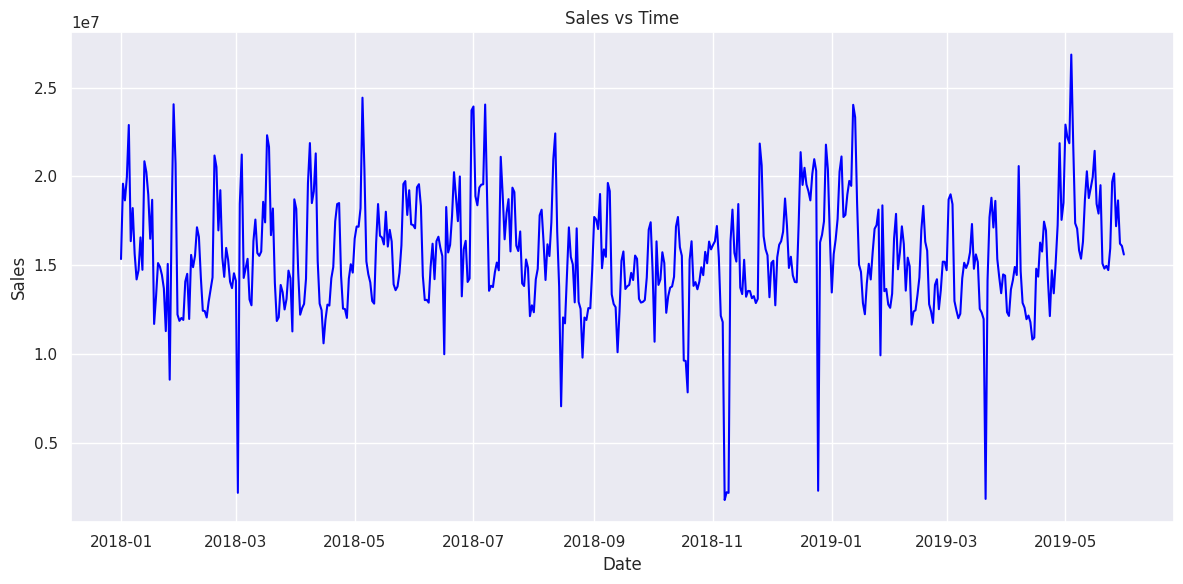

In [27]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(date_Sales['Date'], date_Sales['Sales'], linestyle='-', color='blue')
plt.title('Sales vs Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

## **INSIGHTS :**
The plot displays sales data over time, ranging from early 2018 to mid-2019. We can observe a generally fluctuating pattern in sales throughout this period. There appear to be some recurring dips and peaks, suggesting potential seasonality or cyclical trends in the sales figures. Notably, there are a few significant drops in sales at various points, which might warrant further investigation to understand the underlying causes. Overall, while there isn’t a clear upward or downward trend, the variability in sales indicates dynamic market conditions or internal factors influencing sales performance.

# **Hypothesis Testing**

### **Sales on Discount days vs Non-Discount Days**

**Impact of Discounts on Sales:**

**Null Hypothesis (H₀):** There is no significant difference in mean sales between days with discounts and without.

**Alternative Hypothesis (H₁):** There is a significant difference in mean sales — i.e., discounts impact sales.


In [28]:
discount_sales = train[train['Discount'] == "Yes"]['Sales']
no_discount_sales = train[train['Discount'] == "No"]['Sales']

In [29]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(discount_sales, no_discount_sales, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 145.92946158629138
P-value: 0.0


Since p-value < 0.05, Reject the null hypothesis (H₀)

✅ There is a statistically significant difference in mean sales between days with and without discounts.

In [30]:
print("Mean sales with discount:", discount_sales.mean())
print("Mean sales without discount:", no_discount_sales.mean())

Mean sales with discount: 49426.49761961822
Mean sales without discount: 37403.67967804249


## **Conclusion :**
**Discount Day Average Sales are higher than average sales on Non-Discount Days**

### **Effect of Holidays on Sales:**
**H₀ (Null Hypothesis):** Mean sales on holidays = Mean sales on non-holidays (no difference).

**H₁ (Alternative Hypothesis):** Mean sales on holidays ≠ Mean sales on non-holidays (there is a difference).


In [31]:
holiday_sales = train[train['Holiday'] == 1]['Sales']
non_holiday_sales = train[train['Holiday'] == 0]['Sales']


In [32]:
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -66.1757648298698
P-value: 0.0


**Since p-value < 0.05 (in fact, extremely small)**

*   **Reject the null hypothesis (H₀)**
*   **Sales on holidays are significantly different from non-holidays**

In [33]:
print("Mean sales on holidays:     ", holiday_sales.mean())
print("Mean sales on non-holidays: ", non_holiday_sales.mean())

Mean sales on holidays:      35451.87892989525
Mean sales on non-holidays:  43897.28899828767


## **Conclusion :**
**Holiday Average Sales are lesser than average sales on Non-Holidays**

### **Sales Differences Across Store Types**


**H₀ (Null Hypothesis):** Mean sales are equal across all store types (S1 = S2 = S3 = S4 = S5).

**H₁ (Alternative Hypothesis):** At least one store type has a different mean sales value.



In [34]:
from scipy.stats import f_oneway

In [35]:
s1 = train[train['Store_Type'] == 'S1']['Sales']
s2 = train[train['Store_Type'] == 'S2']['Sales']
s3 = train[train['Store_Type'] == 'S3']['Sales']
s4 = train[train['Store_Type'] == 'S4']['Sales']

In [36]:
from scipy.stats import shapiro

# Run Shapiro-Wilk test for each group
for name, group in train.groupby("Store_Type"):
    stat, p = shapiro(group["Sales"])
    print(f"Store Type {name}: p-value = {p}")


Store Type S1: p-value = 6.244850959544344e-79
Store Type S2: p-value = 2.313188234690706e-51
Store Type S3: p-value = 2.4892304934955129e-57
Store Type S4: p-value = 7.54256999559744e-79


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 88752.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 28896.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24768.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45924.
  res = hypotest_fun_out(*samples, **kwds)


**Normality test fails for every store type group, it means the data isn’t normally distributed, violating ANOVA’s key assumption.Performing a non-parametric test like the Kruskal-Wallis test is more appropriate.**

In [38]:
from scipy.stats import kruskal

# Split into groups by Store_Type
groups = [group['Sales'].values for name, group in train.groupby('Store_Type')]

# Run Kruskal-Wallis test
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {stat}")
print(f"p-value: {p}")

Kruskal-Wallis H-statistic: 73677.05699774956
p-value: 0.0


**Since p-value < 0.05**
* **Reject the null hypothesis (H₀)**
* **There is a statistically significant difference in mean sales between store types (S1–S4).**

In [39]:
s1.mean(), s2.mean(), s3.mean(), s4.mean()

(np.float64(37676.51169449702),
 np.float64(27530.828221553154),
 np.float64(47063.06820857558),
 np.float64(59945.68592565978))

### **Conclusion :**
**Average Sales of Store Type S4 is higher and is followed by S3 , S1 ,S2.**

### **Regional Sales Variability**

**H₀ (Null Hypothesis):**Mean sales are the same across all regions.

**H₁ (Alternative Hypothesis):** At least one region has a significantly different mean sales value.

In [40]:
R1 = train[train['Region_Code'] == "R1"]['Sales']
R2 = train[train['Region_Code'] == "R2"]['Sales']
R3 = train[train['Region_Code'] == "R3"]['Sales']
R4 = train[train['Region_Code'] == "R4"]['Sales']

In [41]:
from scipy.stats import shapiro

In [43]:
# Run Shapiro-Wilk test for each Region_Code group
for region in train['Region_Code'].unique():
    stat, p = shapiro(train[train['Region_Code'] == region]['Sales'])
    print(f"{region} - Shapiro p-value: {p}")

R1 - Shapiro p-value: 5.568579127456188e-90
R4 - Shapiro p-value: 2.5918854183877692e-68
R2 - Shapiro p-value: 6.326690054699451e-85
R3 - Shapiro p-value: 1.174723480209048e-78


**Normality test fails for every Region Code group, it means the data isn’t normally distributed, violating ANOVA’s key assumption.Performing a non-parametric test like the Kruskal-Wallis test is more appropriate.**

In [44]:
from scipy.stats import kruskal

groups = [group['Sales'].values for name, group in train.groupby('Region_Code')]
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {stat}")
print(f"p-value: {p}")

Kruskal-Wallis H-statistic: 3968.063590460667
p-value: 0.0


**All regions have p < 0.05, meaning none of the region-wise sales distributions are normal.Therefore,using Kruskal–Wallis test (non-parametric).**

Since the p-value = 0.0,
* Reject the null hypothesis (H₀)
* There is a statistically significant difference in mean sales across regions.
* At least one region has a different mean sales than the others.

In [46]:
R1.mean(), R2.mean(), R3.mean(), R4.mean()

(np.float64(46765.48840538259),
 np.float64(40054.84734440753),
 np.float64(42144.517062601415),
 np.float64(39743.43424883721))

### **Conclusion :**
**Average Sales of Region_Code R1 is higher and is followed by R3 , R2 ,R1.**

### **Correlation between Number of Orders and Sales:**



**H₀ (Null Hypothesis):** There is no correlation between number of orders and sales.

 **H₁ (Alternative Hypothesis):** There is a correlation between number of orders and sales.



In [47]:
from scipy.stats import shapiro

print("Sales normality:", shapiro(train['Sales']))
print("Orders normality:", shapiro(train['#Order']))

Sales normality: ShapiroResult(statistic=np.float64(0.9339618376020248), pvalue=np.float64(6.948606255821301e-114))
Orders normality: ShapiroResult(statistic=np.float64(0.9193740189739166), pvalue=np.float64(1.666744832152664e-119))


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 188340.
  res = hypotest_fun_out(*samples, **kwds)


Both p-values are far below 0.05
*   Reject the null hypothesis of normality
*   Both Sales and #Order are not normally distributed

In [48]:
from scipy.stats import spearmanr

corr, p_val = spearmanr(train['#Order'], train['Sales'])
print("Spearman correlation:", corr)
print("P-value:", p_val)

Spearman correlation: 0.9377462542885381
P-value: 0.0


**A higher number of orders strongly and significantly correlates with higher sales.
The relationship is positive and monotonic — as order count increases, so does sales.**

## **Key Insights**

* **Store and Location Distribution:**

Store Type S1 and Location Type L1 dominate the dataset, indicating a concentration of business in these categories. Region R1 also has the highest store representation.

* **Sales Distribution:**

Sales are right-skewed, with most orders falling between ₹10,000 and ₹60,000. The jump from the 99th percentile (₹102k) to 100th percentile (₹247k) shows extreme outliers impacting revenue.

* **Performance by Store and Location:**

Store Type S4 and Location Type L2 have the highest average sales, while Store Type S2 and locations L3, L4, and L5 underperform.

* **Discount and Holiday Effects:**

Discount days yield higher average sales, but sales drop on holidays compared to regular days.

* **Sales Over Time and Order Correlation:**

Sales fluctuate seasonally with no clear growth trend. A strong positive correlation exists between order count and total sales.

# **Recommendations**

* **Boost Underperforming Stores and Locations**

Focus on Store Type S2 and locations L3, L4, L5 by analyzing local challenges and tailoring marketing, product assortment, and staff training to improve sales.

* **Manage High-Value Outliers**

Investigate extreme high-value sales separately to understand their causes. Use insights to target premium customers or bulk buyers while managing associated risks.

* **Expand Discount Campaigns Strategically**

Leverage the success of discount days by carefully increasing targeted promotions, focusing on products and customers that respond well without hurting profit margins.

* **Enhance Holiday Promotions**

Create holiday-specific offers and marketing to boost sales during periods when demand typically drops, using special deals or local event tie-ins.

* **Align Operations with Seasonality**

Plan inventory, staffing, and supply chain based on seasonal sales trends—ramping up for peaks and optimizing costs during slower periods.

* **Drive More Orders to Increase Sales**

Encourage higher transaction volumes through loyalty programs, upselling, and personalized experiences, as more orders strongly correlate with higher sales.